In [1]:
from tensorflow.keras.utils import to_categorical
from skimage import filters
import tensorflow as tf        
from scipy.ndimage import gaussian_filter



print('Tensorflow version:', tf.__version__, '(Expected 2.7.0)')

# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_normalized = x_train/255
x_test_normalized = x_test/255 
x_train= x_train_normalized.reshape(-1, 28, 28, 1)
x_test = x_test_normalized.reshape(-1, 28, 28, 1)

train_size_bytes = x_train.nbytes
print(f"Größe der Trainingsdaten: {train_size_bytes} Bytes")

#giving images a binary threshold to only have black or white pixels
threshold = 127
x_train_binary = (x_train > threshold).astype('float32')
x_test_binary = (x_test > threshold).astype('float32')

binary_train_size_bytes = x_train_binary.nbytes
print(f"Größe der binären Trainingsdaten: {binary_train_size_bytes} Bytes")


# Anwendung des Sobel-Filters
x_train_edges = filters.sobel(x_train_binary)
x_test_edges = filters.sobel(x_test_binary)


# Anwendung des Gauß-Filters
sigma = 1.0  # Standardabweichung des Gauß-Filters
x_train_smoothed = gaussian_filter(x_train_edges, sigma=sigma)
x_test_smoothed = gaussian_filter(x_test_edges, sigma=sigma)


# one-hot encoding of labels
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print(y_train_one_hot.shape)
print(y_test_one_hot.shape)





Tensorflow version: 2.14.0 (Expected 2.7.0)
Größe der Trainingsdaten: 376320000 Bytes
Größe der binären Trainingsdaten: 188160000 Bytes
(60000, 10)
(10000, 10)


In [2]:
marvin1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

marvin1.summary()

marvin2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.03), input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(2, (6, 1), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(4, (1, 6), activation='relu'),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),  # Anpassung der Dense-Schicht
    tf.keras.layers.Dropout(0.025),  # Dropout-Schicht hinzugefügt
    tf.keras.layers.Dense(10, activation='softmax')
])

marvin2.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0


##### Hint: 
Find out about Keras activation functions [here](https://keras.io/api/layers/activations/) and about layers [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers). The input shape only needs to be defined for the input layer. Using softmax in your output layer will give you the pleasant effect of a probability distribution for your prediction. The output of softmax transformation has all values non-negative and sum to 1.

In [3]:
import tensorflow as tf
# Define of loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


#print(-tf.math.log(1/10))

#sampleID = 100
#loss_fn(y_train[:1], marvin2(x_train[sampleID-1:sampleID]).numpy()).numpy()




In [4]:
from tensorflow.keras.optimizers import RMSprop
# Compiling basically means to prepare the training routine for your model which consists of the optimizer, 
# the loss, and the metrics which are to be reported during training

marvin2.compile(optimizer=RMSprop(learning_rate=0.003, rho=0.9), 
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
import datetime
import os

# for tensorboard visualisation 
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [6]:
# marvin1.fit(
#     x_train,
#     y_train_one_hot,
#     epochs= 10,
#     batch_size= 128,
#     validation_data=(x_test, y_test_one_hot),
#     callbacks=[tensorboard_callback]
# )

marvin2.fit(
    x_train,
    y_train_one_hot,
    epochs= 6,
    batch_size= 256,
    validation_data=(x_test, y_test_one_hot),
    callbacks=[tensorboard_callback]
)



Epoch 1/6
235/235 [==============================] - 17s 62ms/step - loss: 1.1349 - accuracy: 0.6265 - val_loss: 0.5781 - val_accuracy: 0.8191
Epoch 2/6
235/235 [==============================] - 14s 58ms/step - loss: 0.5781 - accuracy: 0.8141 - val_loss: 0.4122 - val_accuracy: 0.8742
Epoch 3/6
235/235 [==============================] - 14s 58ms/step - loss: 0.4667 - accuracy: 0.8533 - val_loss: 0.3429 - val_accuracy: 0.8953
Epoch 4/6
235/235 [==============================] - 14s 57ms/step - loss: 0.4037 - accuracy: 0.8735 - val_loss: 0.3022 - val_accuracy: 0.9081
Epoch 5/6
235/235 [==============================] - 14s 58ms/step - loss: 0.3670 - accuracy: 0.8861 - val_loss: 0.2838 - val_accuracy: 0.9115
Epoch 6/6
235/235 [==============================] - 13s 57ms/step - loss: 0.3426 - accuracy: 0.8927 - val_loss: 0.2794 - val_accuracy: 0.9134


In [ ]:
import subprocess

# start tensorboard for analysis, to see open browser with : http://localhost:6006/
subprocess.call(["tensorboard", "--logdir=" + logdir])

In [7]:
#save model
model_name = 'marvin_binary_edgedetection_onehot_leakyrelu_.h5'
marvin2.save(model_name, save_format='h5') 
print('saved as: ', model_name)


saved as:  marvin_binary_edgedetection_onehot_leakyrelu_.h5


c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 7ms/step
Genauigkeit: 0.9134
Präzision: 0.9154504794248989
Rückruf: 0.9134
F1-Score: 0.9130184458045922
Cohen's Kappa: 0.9037241392865789


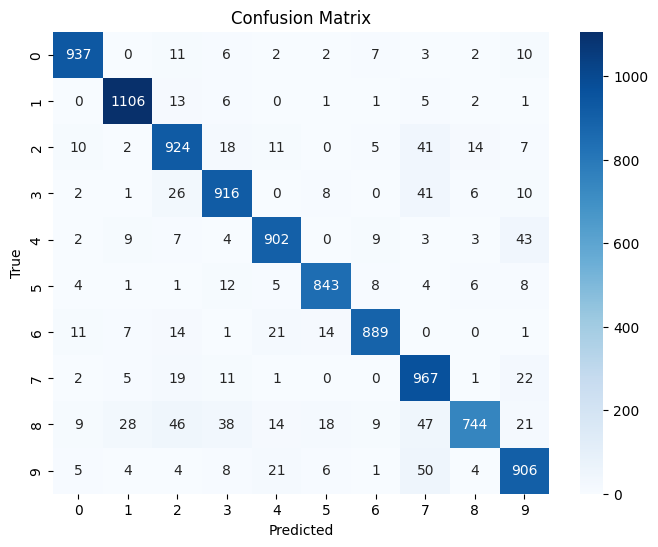

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       980
           1       0.95      0.97      0.96      1135
           2       0.87      0.90      0.88      1032
           3       0.90      0.91      0.90      1010
           4       0.92      0.92      0.92       982
           5       0.95      0.95      0.95       892
           6       0.96      0.93      0.94       958
           7       0.83      0.94      0.88      1028
           8       0.95      0.76      0.85       974
           9       0.88      0.90      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [8]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import tensorflow as tf

# load saved marvin configuration 
model_name = 'marvin_binary_edgedetection_onehot_leakyrelu_.h5'
marvin_reloaded = tf.keras.models.load_model(model_name)

#let model predict label and load true labels
predictions = np.argmax(marvin_reloaded.predict(x_test), axis=1)
true_labels = np.argmax(y_test_one_hot, axis=1)  

# calculation of metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')
kappa = cohen_kappa_score(true_labels, predictions)

# print of metrics
print(f'Genauigkeit: {accuracy}')
print(f'Präzision: {precision}')
print(f'Rückruf: {recall}')
print(f'F1-Score: {f1}')
print(f'Cohen\'s Kappa: {kappa}')


# calculation of confiuson matrix
cm = confusion_matrix(np.argmax(y_test_one_hot, axis=1), predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# classification report with precision, recall, and f1-score
classification_rep = classification_report(np.argmax(y_test_one_hot, axis=1), predictions)
print('Classification Report:\n', classification_rep)



